# Actividad 1. 

Operaciones matricial con regresión lineal.

Cuando se desea hacer una regresion lineal multivariada, existen diferentes formas de realizar la regresión, una de ellas es encontrar el error cuadrático medio y miniminzar el conjunto de parámetros de la regresión emplando algún metodo de minimización, otra forma es encontrar la expresión analítica en forma matricial para enoncontrar el conjunto de parametros de la regresión. En este último caso, la regresion lineal viene dada por la siguiente expresion generalizada:


- $\Theta = (X^T X)^{-1} X^T y$

donte $\Theta$ es la matriz de parametros asociados a la regresión lineal, X la matriz de características y y los valos esperados, así, si tenemos una conjunto de datos en N dimensiones la recta, plano o hyperplano puede ser calculado como:

$Y=\Theta^T X$


En el caso de dos dimensiones, tenemos lo siguiente, Supongamos que X, y Y presentan un comportamiento lineal, y vienen dados por:


- Sea $\vec{X}=x^1, x^2, x^3, x^4, ..., x^m$ 
- Sea $\vec{Y}=y^1, y^2, y^3, y^4, ..., y^m$ 

Para determinar la ecuacion de la recta, hay que conocer los párametros $\theta_0 $, $\theta_1$, que cumplen que :   $y^{i} = \theta_1 x^{i} + \theta_0$ la anterior expresion puede ser escrita como:

\begin{equation}
\begin{bmatrix}
y^{1}\\
y^{2}\\
\vdots\\
y^{m}\\
\end{bmatrix}=
\begin{bmatrix}
\theta_0 & \theta_1 \\
\end{bmatrix}
\begin{bmatrix}
1 & 1 & \cdots & 1 \\
x_1^{1} & x_1^{2} & \cdots & x_1^{m} \\
\end{bmatrix}
\end{equation}


Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

donde: 
\begin{equation}
X=
\begin{bmatrix}
1 & x_1^{1} \\
1 & x_1^{2} \\
\vdots & \vdots \\
1 & x_1^{m} 
\end{bmatrix}
\end{equation}

y 


\begin{equation}
y=
\begin{bmatrix}
y^1 \\
y^2 \\
\vdots\\
y^m
\end{bmatrix}
\end{equation}


In [3]:
#@title Librerías
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#@title Clase
random = np.random.random((20, 20, 3))
#plt.imshow(random)
#plt.show()

#el tamaño de la Matriz
np.shape(random)

#otra forma de definir una matriz a partir de arrays 
v1=np.array([2,3])
v2=np.array([1,5])
v3=np.array([8,3])
M=np.array([v1,v2,v3])
#np.shape(M)
V=np.array([v2,v1,v3])

#Multiplicación de Matrices 
#M@V
#M*V nos da la multiplicaion de entrada por entrada 
#para la transpuesta 
M.T
#Inversa para objetos numpy
#np.linalg.inv(M)

#Se puede redefinir como asmatrix de numpy 
M_m=np.asmatrix(M)
#y la inversa se puede hallar con I 
#M_m.I

# SOLUCIÓN

Su tarea será construir un programa que realice la regresión lineal para los siguientes puntos: 
```python 
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
y = 0.9*x1 + noise
```


In [37]:
#construir la matriz x (variable independiente)
N = 10
x1 = np.linspace(0, 10, N)
noise=2*np.random.random(N)-1
#construir la matriz y (variable dependiente )
y = 0.9*x1 + noise
y=np.reshape(y,(10,1))
#Definimos el array de unos 
ones=np.ones(N)
X=np.array([ones,x1])
X=X.T

Para determinar la matriz de theta entonces se puede aplicar la ecuación:

- $\Theta = (X^T X)^{-1} X^T y$

In [38]:
#Regresion lineal 
theta = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"La pendiente m={theta[1]} e intercepto b={theta[0]}")

La pendiente m=[0.86910958] e intercepto b=[0.39322745]


In [39]:
m=theta[1]
b=theta[0]
regresion= lambda x :m*x+b

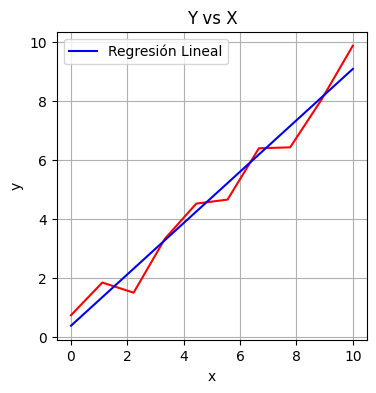

In [40]:
#Gráfica
plt.figure(figsize=(4,4))
plt.plot(x1,y,color='red')
plt.plot(x1,regresion(x1),color='blue',label='Regresión Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Y vs X')
plt.grid()
plt.legend()


**Generalizando  para el siguiente problema bidimensional**



- $\Theta = (X^T X)^{-1} X^T y$

In [41]:
N = 100
noise1=2*np.random.random(N)-1
noise2=2*np.random.random(N)-1
x1 = np.linspace(-1, 1, N) +noise1
x2 = np.linspace(-2, 2, N) +noise2
y = 2*(x1) - 3*(x2) + 0.0 #+ 4*np.random.random(100)

Text(0.5, 0.92, 'Gráfico de dispersión')

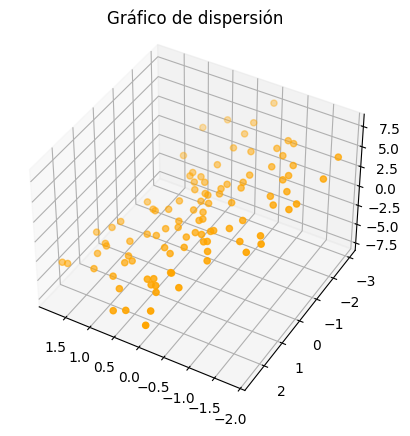

In [42]:
#Gráfica de los puntos anteriores
fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
surf=ax.scatter(x1,x2,y,color='orange')
ax.view_init(elev=40, azim=120)
ax.set_title('Gráfico de dispersión')

In [43]:
#Regresión lineal 
X = np.array((np.ones(N), x1, x2)).T

# Calcular la matriz de parámetros Theta
Theta = np.linalg.inv(X.T @ X) @ X.T @ y

print(f''' El coeficiente del término constante es {Theta[0]},
      
      el coef para la variable x1 y x2 son respectivamente
      
      {Theta[1]} y {Theta[2]}

''')



 El coeficiente del término constante es 3.0531133177191805e-16,
      
      el coef para la variable x1 y x2 son respectivamente
      
      1.9999999999999991 y -3.000000000000001




In [44]:
b=Theta[0]
m1=Theta[1] #coef 1 
m2=Theta[2] #coef 2 

Text(0.5, 0.92, 'Gráfico de la superficie que contiene a los puntos ')

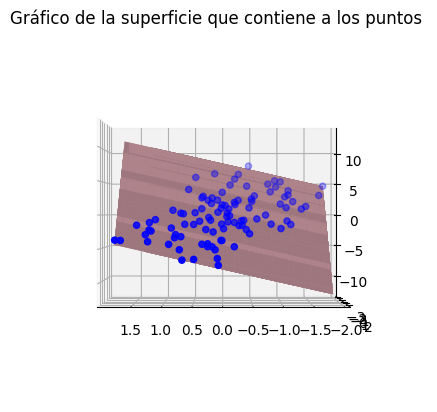

In [45]:
#Gráfica 
N = 100
X1, X2 = np.meshgrid(x1,x2) #se crea una matriz como el dominio 
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y,color='pink')
scatter = ax.scatter(x1, x2, y,"-",color='blue')
ax.view_init(elev=0 ,azim=90)
ax.set_title('Gráfico de la superficie que contiene a los puntos ')

Text(0.5, 0.92, 'Gráfico de la superficie que contiene a los puntos ')

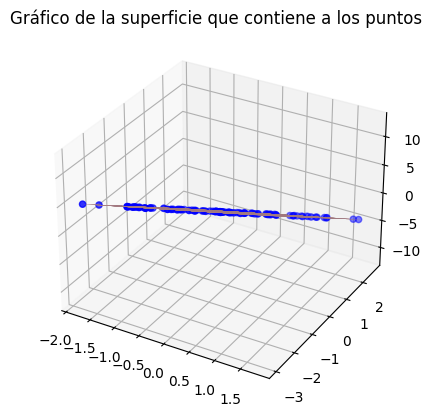

In [46]:
#Diferente perspectiva de la anterior Gráfica 
N = 100
X1, X2 = np.meshgrid(x1,x2) #se crea una matriz como el dominio 
Y = 2*X1 - 3*X2 + 0.0
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Y,color='pink')
scatter = ax.scatter(x1, x2, y,"-",color='blue')
#ax.view_init(elev=0 ,azim=90)
ax.set_title('Gráfico de la superficie que contiene a los puntos ')

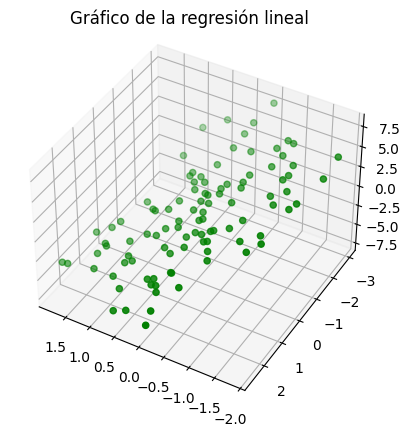

In [47]:
#Gráfica de la regresión lineal 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Graficar la línea de regresión lineal
y_ = b + m1*x1 + m2*x2
ax.scatter(x1, x2, y_,color='green')
ax.set_title('Gráfico de la regresión lineal  ')
ax.view_init(elev=40, azim=120)

Text(0.5, 0.92, 'Gráfico de la regresión lineal  ')

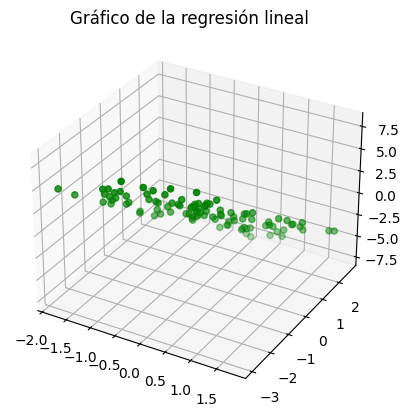

In [48]:
#Visto desde otra perspectiva
#Gráfica de la regresión lineal 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Graficar la línea de regresión lineal
y_ = b + m1*x1 + m2*x2
ax.scatter(x1, x2, y_,color='green')
ax.set_title('Gráfico de la regresión lineal  ')
#ax.view_init(elev=40, azim=120)

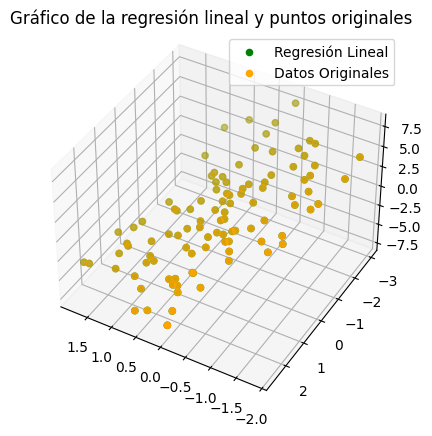

In [49]:
#Gráfico de la superposición de los puntos dados y los de la regresión lineal 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Graficar la línea de regresión lineal
#y_ = b + m1*x1 + m2*x2
y_ = (b + m1*x1 + m2*x2).reshape(x1.shape)

ax.scatter(x1, x2, y_,color='green',label='Regresión Lineal')
#datos originales
ax.scatter(x1, x2, y, color='orange',label='Datos Originales')
ax.set_title('Gráfico de la regresión lineal y puntos originales  ')
ax.view_init(elev=40, azim=120)
ax.legend()